<a href="https://colab.research.google.com/github/CodeVerse-team/python-for-data-analysis-learning-libraries/blob/main/Data%20Frames%20in%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Frames in Pandas

---

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate here):


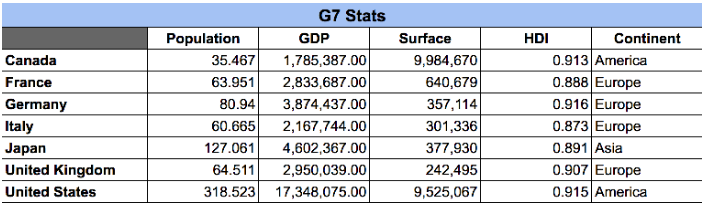

[Link for the Data reference](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?gid=0#gid=0)

Creating `Data Frame` manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csb file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

(The `Columns` attribute is optional I'm using it to keep the same order as in the picture above also it gives a clarity like sort of heading.)

In [4]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


`DataFrame` also have indexes. As you can see in the 'Table' above, pandas has assigned a numeric, autoincremental index automatically to each "Row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [5]:
df.index = {
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States'
}

In [6]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [7]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [8]:
df.index

Index(['Germany', 'Canada', 'Japan', 'United States', 'United Kingdom',
       'Italy', 'France'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Germany to France
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 636.0+ bytes


In [10]:
df.size

35

In [11]:
df.shape

(7, 5)

In [12]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [13]:
df.dtypes

,0
Population,float64
GDP,int64
Surface Area,int64
HDI,float64
Continent,object


In [14]:
df.dtypes.value_counts()

,count
float64,2
int64,2
object,1




---

# Indexing, Selection and Slicing

Individual columns in the Data Frame can be selected with regular indexing. Each Column is represented as a `Series`:

In [15]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [16]:
df.loc['Canada']

,Canada
Population,63.951
GDP,2833687
Surface Area,640679
HDI,0.888
Continent,Europe


In [17]:
df.iloc[-1]

,France
Population,318.523
GDP,17348075
Surface Area,9525067
HDI,0.915
Continent,America


In [18]:
df['Population']

,Population
Germany,35.467
Canada,63.951
Japan,80.940
United States,60.665
United Kingdom,127.061
Italy,64.511
France,318.523


Note that the `Index`of the returned Series in the same as the DataFrame one. And its `name` is the name of the column. if you're working on a notebook and want to see a more DataFrame - like format you can use the `to_frame` method

In [19]:
df['Population'].to_frame()

,Population
Germany,35.467
Canada,63.951
Japan,80.940
United States,60.665
United Kingdom,127.061
Italy,64.511
France,318.523


Multile columns can also be selected similarly to `Numpy` and `Series`

In [20]:
df[['Population', 'GDP']]

,Population,GDP
Germany,35.467,1785387
Canada,63.951,2833687
Japan,80.940,3874437
United States,60.665,2167744
United Kingdom,127.061,4602367
Italy,64.511,2950039
France,318.523,17348075


in this case, the reseult is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [21]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe


In [24]:
 df.iloc[1:3, 3] # here we are asking for the row 1 to 3, and the column is to be from 3rd one.

,HDI
Canada,0.888
Japan,0.916


In [25]:
df.iloc[1:3, [0,3]]

,Population,HDI
Canada,63.951,0.888
Japan,80.940,0.916


In [26]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
Canada,2833687,640679
Japan,3874437,357114



> RECOMMENDED: Always use `loc` and `iloc` to reduce ambiguity, specially with `DataFrame` with numeric indexes



# Conditional Selection (boolean arrays)
we saw conditional selection applied to `Series` and it'll work in the same way for `DataFrame`. Afterall, a `Data Frame` is a collection of `Series`

In [27]:
df

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Canada,63.951,2833687,640679,0.888,Europe
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [28]:
df['Population'] > 70

,Population
Germany,False
Canada,False
Japan,True
United States,False
United Kingdom,True
Italy,False
France,True


In [29]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Japan,80.940,3874437,357114,0.916,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
France,318.523,17348075,9525067,0.915,America


In [33]:
df.loc[df['Population'] > 70, 'Population']

,Population
Japan,80.940
United Kingdom,127.061
France,318.523


In [34]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Japan,80.940,3874437
United Kingdom,127.061,4602367
France,318.523,17348075


# Dropping stuff
Opposed to the Concept of selection, we have 'Dropping'. Instead of pointing out which values you'd like to select you could point which ones you'dlike to `drop`:

In [35]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [39]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


In [40]:
df.drop(columns = ['Population', 'HDI'])

,GDP,Surface Area,Continent
Germany,1785387,9984670,America
Canada,2833687,640679,Europe
Japan,3874437,357114,Europe
United States,2167744,301336,Europe
United Kingdom,4602367,377930,Asia
Italy,2950039,242495,Europe
France,17348075,9525067,America


In [42]:
df.drop(['Italy', 'Canada'], axis = 0)

,Population,GDP,Surface Area,HDI,Continent
Germany,35.467,1785387,9984670,0.913,America
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
France,318.523,17348075,9525067,0.915,America


In [45]:
df.drop(['Population', 'HDI'], axis = 1)

,GDP,Surface Area,Continent
Germany,1785387,9984670,America
Canada,2833687,640679,Europe
Japan,3874437,357114,Europe
United States,2167744,301336,Europe
United Kingdom,4602367,377930,Asia
Italy,2950039,242495,Europe
France,17348075,9525067,America


In [47]:
df.drop(['Population', 'HDI'], axis = 'columns')

,GDP,Surface Area,Continent
Germany,1785387,9984670,America
Canada,2833687,640679,Europe
Japan,3874437,357114,Europe
United States,2167744,301336,Europe
United Kingdom,4602367,377930,Asia
Italy,2950039,242495,Europe
France,17348075,9525067,America


In [48]:
df.drop(['Canada', 'Germany'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
Japan,80.940,3874437,357114,0.916,Europe
United States,60.665,2167744,301336,0.873,Europe
United Kingdom,127.061,4602367,377930,0.891,Asia
Italy,64.511,2950039,242495,0.907,Europe
France,318.523,17348075,9525067,0.915,America


All these `Drop` methods return a new `DataFrame`. if you'd like to modify it "in place", you can use the `inplace` attribute (there's an example below).

# Operations

In [49]:
df[['Population', 'GDP']]

,Population,GDP
Germany,35.467,1785387
Canada,63.951,2833687
Japan,80.940,3874437
United States,60.665,2167744
United Kingdom,127.061,4602367
Italy,64.511,2950039
France,318.523,17348075


In [51]:
df[['Population', 'GDP']] / 100

,Population,GDP
Germany,0.35467,17853.87
Canada,0.63951,28336.87
Japan,0.80940,38744.37
United States,0.60665,21677.44
United Kingdom,1.27061,46023.67
Italy,0.64511,29500.39
France,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [53]:
eg = pd.Series([-1_000_000, -0.3], index = ['GDP', 'HDI'])
eg

,0
GDP,-1000000.0
HDI,-0.3


In [56]:
df[['GDP', 'HDI']]  + eg # by doing this we get to know that we can do operations between a Series and DataFrame

,GDP,HDI
Germany,785387.0,0.613
Canada,1833687.0,0.588
Japan,2874437.0,0.616
United States,1167744.0,0.573
United Kingdom,3602367.0,0.591
Italy,1950039.0,0.607
France,16348075.0,0.615


,GDP,HDI
Germany,2785387.0,1.213
Canada,3833687.0,1.188
Japan,4874437.0,1.216
United States,3167744.0,1.173
United Kingdom,5602367.0,1.191
Italy,3950039.0,1.207
France,18348075.0,1.215
